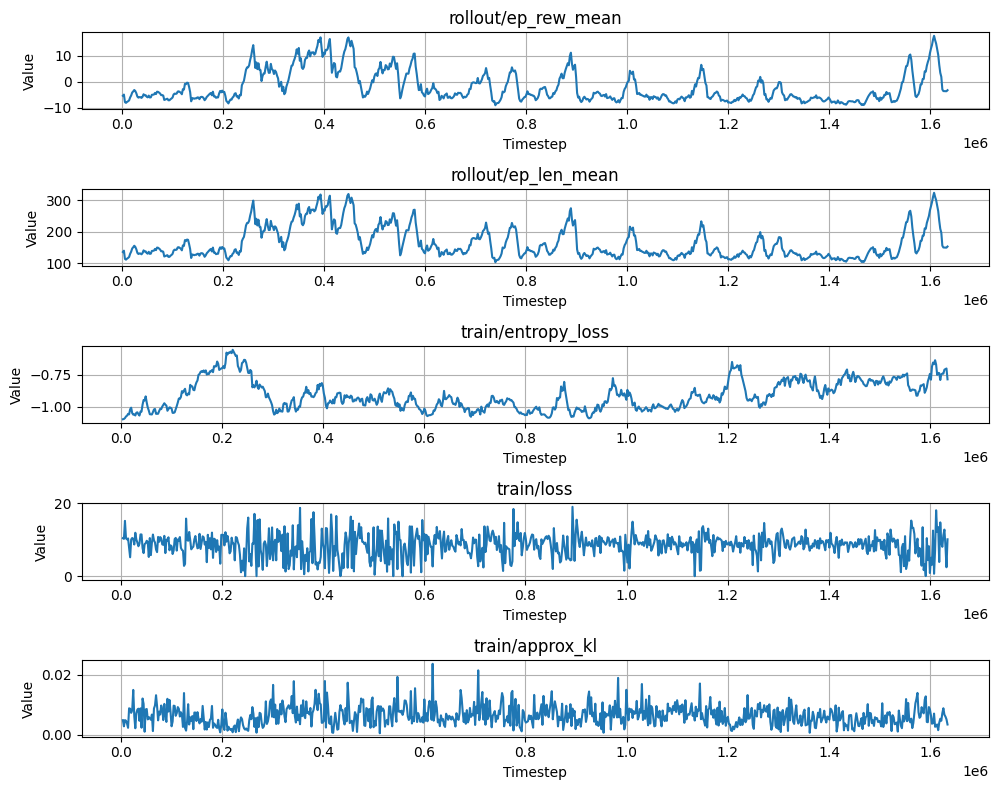

In [ ]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Ruta a tu fichero de eventos
event_path = "events.out.tfevents.1743856415.1e87da2cafb4.747.1"

# Cargar el archivo
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# Métricas que quieres visualizar
metrics = [
    "rollout/ep_rew_mean",
    "rollout/ep_len_mean",
    "train/entropy_loss",
    "train/loss",
    "train/approx_kl",
]

# Graficar
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 8))
for i, tag in enumerate(metrics):
    if tag in event_acc.Tags()['scalars']:
        events = event_acc.Scalars(tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]
        axs[i].plot(steps, values)
        axs[i].set_title(tag)
        axs[i].set_xlabel("Timestep")
        axs[i].set_ylabel("Value")
        axs[i].grid(True)
    else:
        axs[i].text(0.5, 0.5, f"{tag} no encontrado", ha='center')

plt.tight_layout()
plt.show()
